#**K-Nearest-Neighbour-Algorithm**

##AIM: To implement K Nearest Neighbours Algorithm

K-Nearest Neighbors (KNN) is a simple yet powerful machine learning algorithm used for classification and regression. It is a non-parametric algorithm, meaning it does not make any assumptions about the underlying data distribution.

-


The KNN algorithm can be summarized in the following steps:

*   Calculate the distance between the new observation and each training observation.
*   Identify the k-nearest neighbors to the new observation based on the distance metric.
*  Predict the value of the target variable based on the values of the k-nearest neighbors.





The most commonly used distance metric in KNN is the Euclidean distance, which is given by the formula:

**Euclidean distance**

$d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$

In [93]:
import numpy as np
import pandas as pd
from collections import Counter


$$y = \operatorname{mode}(y_{i_1}, y_{i_2}, y_{i_3})$$

where $i_1, i_2, i_3$ are the indices of the three nearest neighbors to $\mathbf{x}$, and $\operatorname{mode}$ is the function that returns the most common class label among the neighbors.

The distance between $\mathbf{x}$ and the neighbors is calculated using the Euclidean distance:

$$d_i = \sqrt{\sum_{j=1}^p (x_j - x_{i,j})^2}$$

where $x_j$ is the value of the $j$th feature of $\mathbf{x}$, and $x_{i,j}$ is the value of the $j$th feature of the $i$th neighbor.


In [94]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def predictReg(self, X):
        predictions = [self._predictReg(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

    def _predictReg(self,x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return np.mean(k_nearest_labels)



##**KNN Classification**

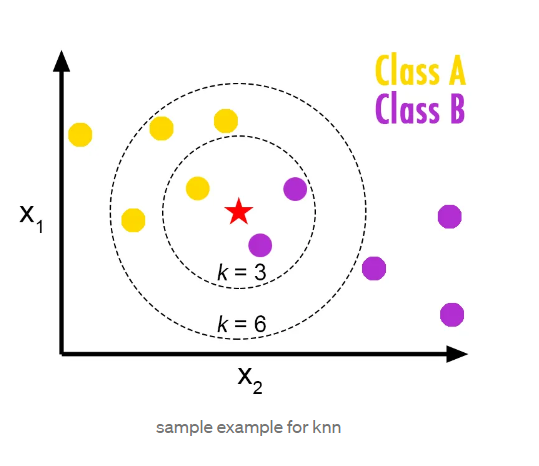



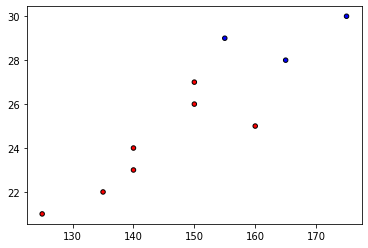

[0, 0]
1.0


In [95]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

data = {'height': [5.9, 5.7, 5.8, 5.6, 5.5, 6.1, 5.9, 5.8, 5.7, 5.6],
        'weight': [160, 140, 150, 135, 125, 175, 165, 155, 150, 140],
        'age': [25, 23, 27, 22, 21, 30, 28, 29, 26, 24],
        'gender': [0, 0, 0, 0, 0, 1, 1, 1, 0, 0]}

df = pd.DataFrame(data)

# Separate the features and target variable
X = df.drop('gender', axis=1)
y = df['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
X_train=np.array(list([list(X_train.iloc[i]) for i in range(len(X_train))]))
X_test=np.array(list([list(X_test.iloc[i]) for i in range(len(X_test))]))
y_train=list(y_train)
y_test=list(y_test)
# print(X_test)
plt.scatter(X.iloc[:,1],X.iloc[:,2], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()
# print(type(X_test.iloc[1]))

clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)
# print(y_test)
p=np.sum([1 if predictions[i] == y_test[i] else 0 for i in range(len(y_test)) ])
acc = np.ceil(p / len(y_test))
print(acc)


##**KNN - Regression**

For KNN regression, the predicted value of the target variable for a new data point $\mathbf{x}$ is the average of the values of the $k$ nearest neighbors to $\mathbf{x}$. The formula for KNN regression is:

$$\hat{y} = \frac{1}{k}\sum_{i=1}^k y_i$$

where $\hat{y}$ is the predicted value of the target variable, $k$ is the number of neighbors, and $y_i$ is the value of the target variable for the $i$th neighbor. 

The distance between $\mathbf{x}$ and the neighbors is calculated using the Euclidean distance:

$$d_i = \sqrt{\sum_{j=1}^p (x_j - x_{i,j})^2}$$

where $x_j$ is the value of the $j$th feature of $\mathbf{x}$, and $x_{i,j}$ is the value of the $j$th feature of the $i$th neighbor.

To use KNN regression, we need to specify the value of $k$ and a distance metric. The most commonly used distance metric is the Euclidean distance. The optimal value of $k$ and the distance metric can be determined using cross-validation or other tuning methods.


[150, 150, 140]


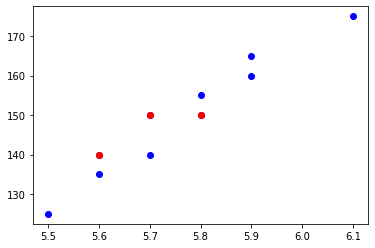

In [96]:
data = {'height': [5.9, 5.7, 5.8, 5.6, 5.5, 6.1, 5.9, 5.8, 5.7, 5.6],
        'weight': [160, 140, 150, 135, 125, 175, 165, 155, 150, 140]}

reg = KNN(k=5)
reg.fit(data['height'], data['weight'])
test=[5.7,5.8,5.6]
predictions = reg.predict(test)
print(predictions)

plt.scatter(data['height'], data['weight'],color="blue")
plt.scatter(test,predictions,color="red")
plt.show()